# Market Mix Analysis

# Preface: 
- ***Im a Data Enthusiast, still learning. Please show your support by upvoting and comment your suggestion and feel free to correct me whereever Im wrong.***

## Predicting New Sales using Linear Regression Model

I wrote this notebook to help the **#machineLearning** and **#linearregresion** novice to understand better how these things work. In this Notebook one can learn or get an overview of **how to perform EDA on both numerical and categorical feature, handling missing-valuesbasic and build a Linear regression model** from **#statsmodels** and aslo to check the model performance considering the **#mean_absolute_error** and **#MAPE scores**. 

I encourage you to fork this kernel, play with the code and can ask for any kind of help to understand these in comments . Good luck!

## Quick ride through Linear Regression

***For getting a gist of Linear Regression click on the link below.***

Click here: **[Introduction_to_Linear_Regression](http://github.com/veer064/Linear-Regression/blob/master/README.md)** (This will take you to github.com)
---

# Dataset

**We will be using *mktmix.csv* a Marketing Mix dataset in csv format.**

You can download the dataset from the following github link: [mktmix.csv](https://github.com/veer064/Linear-Regression/tree/master/Market_Mix_Analysis-Sales_Prediction)


# Objective:
- Each row in the data describes the different characteristics of different marketing methods of a product with Total no. of. sales for a week 
- (1 week - 1 row).
- Our goal is to analys this data and build a predictive model that can predict the No. of. Sales for a week, given these features.

## Now that we have some context, let's get started

In [322]:
# Importing Packages and Libraries

#Essential
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Ploting/Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore")
pd.options.display.max_seq_items = 8000
pd.options.display.max_rows = 8000

#Model
import statsmodels.formula.api as smf

#Model Evaluation
import sklearn.metrics as metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

#Dataset Path, which I uploaded to Data folder.
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        print('Copy the above path and paste this in your read_csv(), to load the dataset as pandas dataframe.')

/kaggle/input/mktmix.csv
Copy the above path and paste this in your read_csv(), to load the dataset as pandas dataframe.


In [323]:
#Reading the dataset as a DataFrame
#Lets give our dataframe name -> marketing

marketing = pd.read_csv('/kaggle/input/mktmix.csv')

### Top 5 records of the marketing DataFrame

- This gives you a quick view and idea of the data.

In [324]:
#Top 5 records of the marketing DataFrame

marketing.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.03,245.00,15.45,NaN,0.00,101.78,2.28,NaN
1,19387,15.03,314.00,16.39,NaN,0.00,76.73,2.22,NaN
2,23889,14.59,324.00,62.69,NaN,0.05,131.59,2.01,NaN
3,20055,15.33,298.00,16.57,NaN,0.00,119.63,2.20,NaN
4,20064,15.64,279.00,41.50,NaN,0.04,103.44,1.82,NaN


### Shape of the data that we are deaing with
- It is always important to understand and good to know that quantitative information of data
- So that you can decide on the tools and techniques to use to deal with is.

In [325]:
#Shape of the data that we are deaing with

#marketing.shape

print("NO. Of. Rows = %s" % marketing.shape[0])
print("NO. Of. Columns = %s" % marketing.shape[1])

NO. Of. Rows = 104
NO. Of. Columns = 9


### Summary Statistics
- Lets look at the  Summary Statistics of the marketing data,* **this gives you the information like mean, std, Quartile1, Quartile2, Quartile3, min and max values of a each and evry numeric features in our marketing DataFrame. ***

In [326]:
#Summary Statistics

#Using pandas options to set float_format to 2 decimals after the point.
pd.options.display.float_format = '{:.2f}'.format   #This makes the table clear and easy to understand

marketing.describe()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
count,104.00,104.00,100.00,104.00,104.00,104.00,104.00
mean,20171.07,15.31,256.69,32.92,0.02,141.01,2.55
std,1578.60,0.53,86.99,13.68,0.03,42.95,0.31
min,17431.00,13.74,0.00,10.78,0.00,37.66,1.82
25%,19048.75,15.03,235.00,22.18,0.00,117.11,2.32
50%,19943.50,15.33,278.50,31.16,0.00,138.58,2.50
75%,20942.75,15.64,313.25,41.08,0.05,175.68,2.81
max,24944.00,16.28,399.00,68.12,0.09,240.29,3.16


# Observations:
1. Looking at the counts we can see that we have 4 missing values under radio marketing method feature.
2. Range of the Radio data points is comparitively huge.
3. InStore have high std, expecting outliers.
4. The median of the Discount feature is 0, interesting need to look into it.
5. TV datapoints seem to be distributed normally, lets check on it.
6. Mean of the Stout feature is 2.55, it seems like the stock out rate on an average for week is 2.5 times.  



In [327]:
#Useful, detailed information of the marketing dataset

marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   NewVolSales        104 non-null    int64  
 1   Base_Price         104 non-null    float64
 2   Radio              100 non-null    float64
 3   InStore            104 non-null    float64
 4   NewspaperInserts   6 non-null      object 
 5   Discount           104 non-null    float64
 6   TV                 104 non-null    float64
 7   Stout              104 non-null    float64
 8   Website_Campaign   14 non-null     object 
dtypes: float64(6), int64(1), object(2)
memory usage: 7.4+ KB


# Observations:


1. The dtypes of the available features in the Data are as follows:
   - float64 -> 6 
   - int64   -> 1 
   - object  -> 2
    
2. Total no. of records/entries in the data are 104, ranging from 0 to 103.

3. We can see that we have null - values in  features:
   - Radio, NewspaperInserts and Website_Campaign 

## Now, Lets begin with the crusial part of any Machine Learning or Data Analysis task.

# Epolatory Data Analysis

### Lets start with ***NewVolSales***, the variable which we are going to predict.

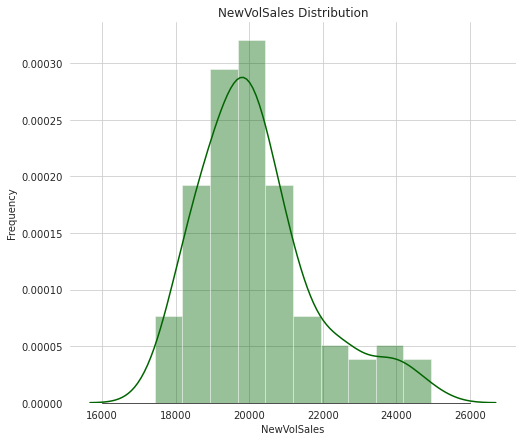

In [328]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(8, 7))

#Check the new distribution 
sns.distplot(marketing['NewVolSales'], color="darkgreen");
ax.xaxis.grid(True)
ax.yaxis.grid(True)
ax.set(ylabel="Frequency")
ax.set(xlabel="NewVolSales")
ax.set(title="NewVolSales Distribution")
sns.despine(trim=True, left=True)
plt.show();

# Observations:
1. From the above we can see that the target variable, ***NewVolSales*** follows **Bimodal Distribution** *(Double-Peaked Distribution)*.
2. Most of the data is around the mean, 20,171.

# Skewness and Kurtosis of the target variable

In [329]:
# Skew and kurt
print("Skewness: %f" % marketing['NewVolSales'].skew())
print("Kurtosis: %f" % marketing['NewVolSales'].kurt())

Skewness: 0.972983
Kurtosis: 0.807122


### For Starter to ML & Statisics:

## Skewness: 
- Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point.
- The skewness for **a normal distribution is zero**, and **any symmetric data should have a skewness near zero**.**Negative values for the skewness indicate data that are skewed left** and **positive values for the skewness indicate data that are skewed right.** 

## Kurtosis: 
- **Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution.** 
- Data sets with *high kurtosis tend to have heavy tails, or outliers.* Data sets with *low kurtosis tend to have light tails, or lack of outliers.*

# Observation:

From Skewness and Kurtosis we can say that the NewVolSales is not symetrically distributed and is heavy tailed.

# Lets Deep dive into independent features

In [330]:
#Finding numeric features

marketing.select_dtypes(include = ['float64', 'int64']).columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout'],
      dtype='object')

In [331]:
#Assigning a variable name to the list of numeric cols in df

num_features = marketing.select_dtypes(include = ['float64', 'int64']).columns.tolist()

num_features

['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV', 'Stout']

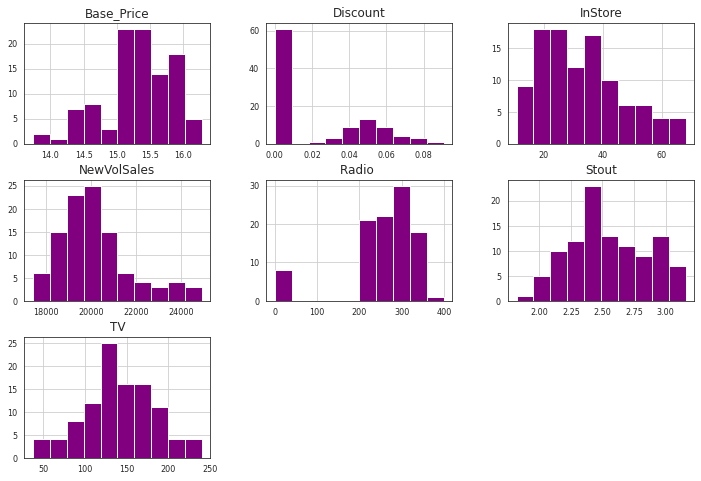

In [332]:
#Visualising num_cols data from marketing dataframe

marketing[num_features].hist(figsize = (12,8), bins = 10, xlabelsize = 8, ylabelsize = 8, color= 'purple');

In my previous Kernal : [House For Sale: At what price?](https://www.kaggle.com/veer06b/house-for-sale-at-what-price) ***I have explained how to read useful insights from histograms, please feel free to go through it.***

# Observations:
- Almost all the features have Outliers.
- Features like ***Discount* and *Radio*** have Mode value '0' for some reason, which effects the mean of these feature. While *imputing missing values for these we should use median.*
- ***Stout*** is a Bimodal distribution, that means its not symetrically distributed.

### Lets move to ahead and do some data cleaning, which highly impacts the efficiency of the model learning.

#### Before doing that we need to work on column names which are not properly framed(They have space at some of thier tails, lts cut them and make them neat.)

In [333]:
marketing.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign '],
      dtype='object')

We can see that, only **'Radio '** and **'Website_Campaign '** are the two column names with such error.

In [334]:
marketing = marketing.rename(columns = { 'NewVolSales' : 'NewVolSales', 
                  'Base_Price' : 'Base_Price', 
                  'Radio ':  'Radio', 
                  'InStore' : 'InStore', 
                  'NewspaperInserts' : 'NewspaperInserts', 
                  'Discount' : 'Discount' , 
                  'TV' : 'TV', 
                  'Stout' : 'Stout', 
                  'Website_Campaign ':  'Website_Campaign'})

In [335]:
marketing.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'NewspaperInserts',
       'Discount', 'TV', 'Stout', 'Website_Campaign'],
      dtype='object')

## Data Cleaning

### Identifying and Handling Missing Values

In [336]:
marketing.isnull().sum()

NewVolSales          0
Base_Price           0
Radio                4
InStore              0
NewspaperInserts    98
Discount             0
TV                   0
Stout                0
Website_Campaign    90
dtype: int64

# Observation:
- As already discussed we can see that the data has 4 NaN values under Radio feature, and 98 NaN values in each under NewspaperInserts and Website_Campaign.

### Note:
- 98 NaNs out of 104 records is a very huge amount. Generally in such cases the whole columns is droped from the data, but here comes the domain knowledge advantage. Here dropping the whole column is not a good idea, we are seeing this high rate of NaN values because these two might not be the major methods of marketing for this company, and they dont use these methods much often.
- In our analysis studying the impact of these two methods is important because, if thse are impacting on the sales for a week when ever these are used then we can suggest the company to increase the usage of these methods.

### So, we are not going to drop any columns or rows from the marketing data we have.



## Imputing Missing Values

In [337]:
#Imputing Median for NaN in Radio

marketing.Radio = marketing.Radio.fillna(marketing['Radio'].median())

### For Handling missing values under categorical feature like "NewspaperInserts" and "Website_Campaign"
we will be using get_dummies() one hot encoding.

In [338]:
#One Hot Encoding on NewspaperInserts

marketing = pd.get_dummies(marketing, columns = ["NewspaperInserts"])

In [339]:
#One Hot Encoding on Website_Campaign


marketing = pd.get_dummies(marketing, columns = ["Website_Campaign"])

In [340]:
#Top 5 records with new columns after encoding

marketing.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign
0,19564,15.03,245.00,15.45,0.00,101.78,2.28,0,0,0,0
1,19387,15.03,314.00,16.39,0.00,76.73,2.22,0,0,0,0
2,23889,14.59,324.00,62.69,0.05,131.59,2.01,0,0,0,0
3,20055,15.33,298.00,16.57,0.00,119.63,2.20,0,0,0,0
4,20064,15.64,279.00,41.50,0.04,103.44,1.82,0,0,0,0


In [341]:
#Total no. of. columns now, after encoding: 

marketing.shape[1]

11

In [342]:
#Column name after encoding:

marketing.columns.tolist()

['NewVolSales',
 'Base_Price',
 'Radio',
 'InStore',
 'Discount',
 'TV',
 'Stout',
 'NewspaperInserts_Insert',
 'Website_Campaign_Facebook',
 'Website_Campaign_Twitter',
 'Website_Campaign_Website Campaign ']

In [343]:
#lets now check for NaN values, if there are any left untreated.

marketing.isnull().sum()

NewVolSales                           0
Base_Price                            0
Radio                                 0
InStore                               0
Discount                              0
TV                                    0
Stout                                 0
NewspaperInserts_Insert               0
Website_Campaign_Facebook             0
Website_Campaign_Twitter              0
Website_Campaign_Website Campaign     0
dtype: int64

So we are successful in treating NaNs.

# Outlier Analysis and Treatment

#### Base_Price

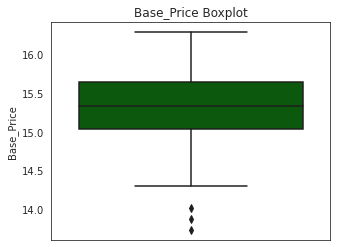

In [344]:
#Boxplot for Base_Price Outliers

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(5, 4))

sns.boxplot('Base_Price', data = marketing, orient = 'v', color = 'darkgreen')
ax.set(title="Base_Price Boxplot")
plt.show();

*We can see there are few outliers under "Base_Price"* below the minimum value, i, e; lower outliers.

In [345]:
#Minimum Value

print("Minimum Value of 'Base_Price' is %s" % marketing['Base_Price'].quantile(0.01))

#The records in which Base_Price has outliers

marketing[marketing['Base_Price'] < marketing['Base_Price'].quantile(0.01)]

Minimum Value of 'Base_Price' is 13.8779529113


,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign
74,24468,13.74,251.00,37.84,0.05,135.15,2.66,0,0,0,0
76,21710,13.87,261.00,34.22,0.00,148.71,2.98,0,0,0,0


### Replacing these outliers with quantile(0.1) value, the min value.

In [346]:
marketing.loc[(marketing['Base_Price'] < marketing['Base_Price'].quantile(0.01)), "Base_Price"]= marketing['Base_Price'].quantile(0.01)

#### Radio

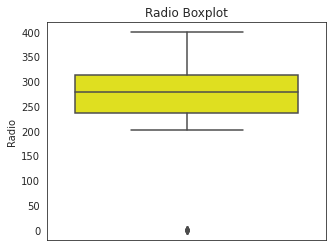

In [347]:
#Boxplot for Radio Outliers

sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(5, 4))

sns.boxplot('Radio', data = marketing, orient = 'v', color = 'yellow')
ax.set(title="Radio Boxplot")
plt.show();

We are not going treate these outliers at 0 (zero), my idea of reasoning this outlier is, its possible that the company didn't promote the product on the Radio, so its obvious that this will be 0 at such times.

- One thing we can do is to understand for how many week in two year this happend.

In [348]:
marketing['Radio'].quantile(np.arange(0,1,0.05))

0.00     0.00
0.05     0.00
0.10   208.30
0.15   212.00
0.20   221.00
0.25   235.75
0.30   245.00
0.35   250.00
0.40   253.80
0.45   270.80
0.50   278.50
0.55   288.95
0.60   290.00
0.65   297.80
0.70   301.00
0.75   312.25
0.80   315.80
0.85   320.00
0.90   326.80
0.95   344.40
Name: Radio, dtype: float64

In [349]:
#Minimum Value

print("Minimum Value of 'Radio' is %s" % marketing['Radio'].quantile(0.10))

#The records in which Base_Price has outliers

marketing[marketing['Radio'] < marketing['Radio'].quantile(0.10)]

Minimum Value of 'Radio' is 208.3


,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,NewspaperInserts_Insert,Website_Campaign_Facebook,Website_Campaign_Twitter,Website_Campaign_Website Campaign
32,21546,15.03,0.00,34.12,0.06,181.52,2.43,0,0,0,0
33,19597,15.64,0.00,18.11,0.00,234.99,2.65,0,0,0,0
34,19696,15.64,0.00,25.41,0.00,235.77,2.47,0,0,0,0
52,19578,15.33,0.00,23.33,0.00,179.13,2.71,0,0,0,0
53,18667,15.64,0.00,19.29,0.00,130.60,2.83,1,0,0,0
54,20690,15.18,0.00,40.30,0.00,128.92,2.55,0,0,0,0
55,20988,15.03,0.00,39.12,0.00,177.91,2.47,0,0,0,0
56,23872,14.88,0.00,63.38,0.06,138.84,2.15,0,0,0,0
86,19561,15.18,201.00,52.14,0.07,98.03,3.07,0,0,0,0
89,18524,15.18,208.00,33.17,0.00,105.88,2.83,0,0,0,1


In [350]:
#Count of such weeks

marketing[marketing['Radio'] < marketing['Radio'].quantile(0.10)].shape[0]

11

## Feature Engineering

### As we already created new columns with the help of One hot encoding. Lets what other feature we can create that helps us in our analysis.

In [351]:
marketing.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'Discount', 'TV',
       'Stout', 'NewspaperInserts_Insert', 'Website_Campaign_Facebook',
       'Website_Campaign_Twitter', 'Website_Campaign_Website Campaign '],
      dtype='object')

**We can classify all the promotion methods into Online and Offline promotion.**
  - Where 'Website_Campaign_Facebook', 'Website_Campaign_Twitter' and 'Website_Campaign_Website Campaign all together can considered as Online.
  - And 'Radio', 'InStore' and 'TV' can be considered as Offline.

In [352]:
marketing['Online'] = marketing['Website_Campaign_Facebook']+ marketing['Website_Campaign_Twitter']+ marketing['Website_Campaign_Website Campaign ']

In [353]:
marketing["Offline"] = marketing['TV'] + marketing['InStore'] + marketing['Radio']

In [354]:
marketing.columns

Index(['NewVolSales', 'Base_Price', 'Radio', 'InStore', 'Discount', 'TV',
       'Stout', 'NewspaperInserts_Insert', 'Website_Campaign_Facebook',
       'Website_Campaign_Twitter', 'Website_Campaign_Website Campaign ',
       'Online', 'Offline'],
      dtype='object')

# Correlation between the target variable and all other independent variables.

In [355]:
corr = marketing.corr()

#Only the reltion coefficients between all other features to NewVolSales.
corr = corr.NewVolSales 

corr = corr.drop('NewVolSales')# Because we dont need the correlation NewVolSales - NewVolSales.

corr[abs(corr).sort_values(ascending = False).index] #ascenfing order irrespective of their sign

Base_Price                           -0.73
InStore                               0.44
Discount                              0.42
Stout                                -0.38
Website_Campaign_Website Campaign    -0.23
Website_Campaign_Twitter              0.19
Offline                               0.17
TV                                    0.15
Website_Campaign_Facebook            -0.12
Online                               -0.12
NewspaperInserts_Insert              -0.06
Radio                                 0.04
Name: NewVolSales, dtype: float64

# Obervations:

1. Its obvious that Base_Price and Sales have high negitive Correlation.
2. InStore have comparitively good correlation becuase the sales majorly happens at the store and the customer influenced by promotion, has good chances of thinking to buy the product at the store itself.
3. Its obvious that Discount and Sales have positive correlation Correlation.

### Visualisation of the correlation

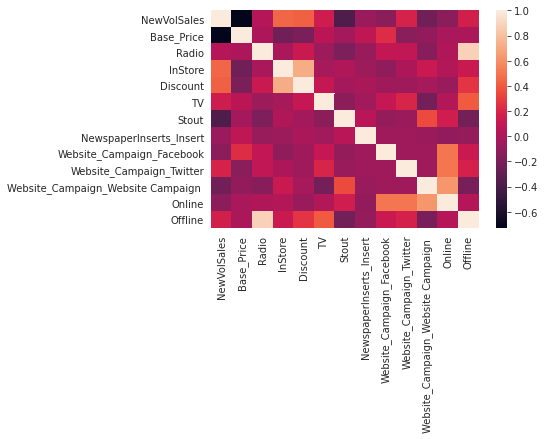

In [356]:
corr = marketing.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.index.values);

Lets Check
# Feature to Feture correlation for checking multicollinearity

This will help us in feture reduction

#Pair Plot

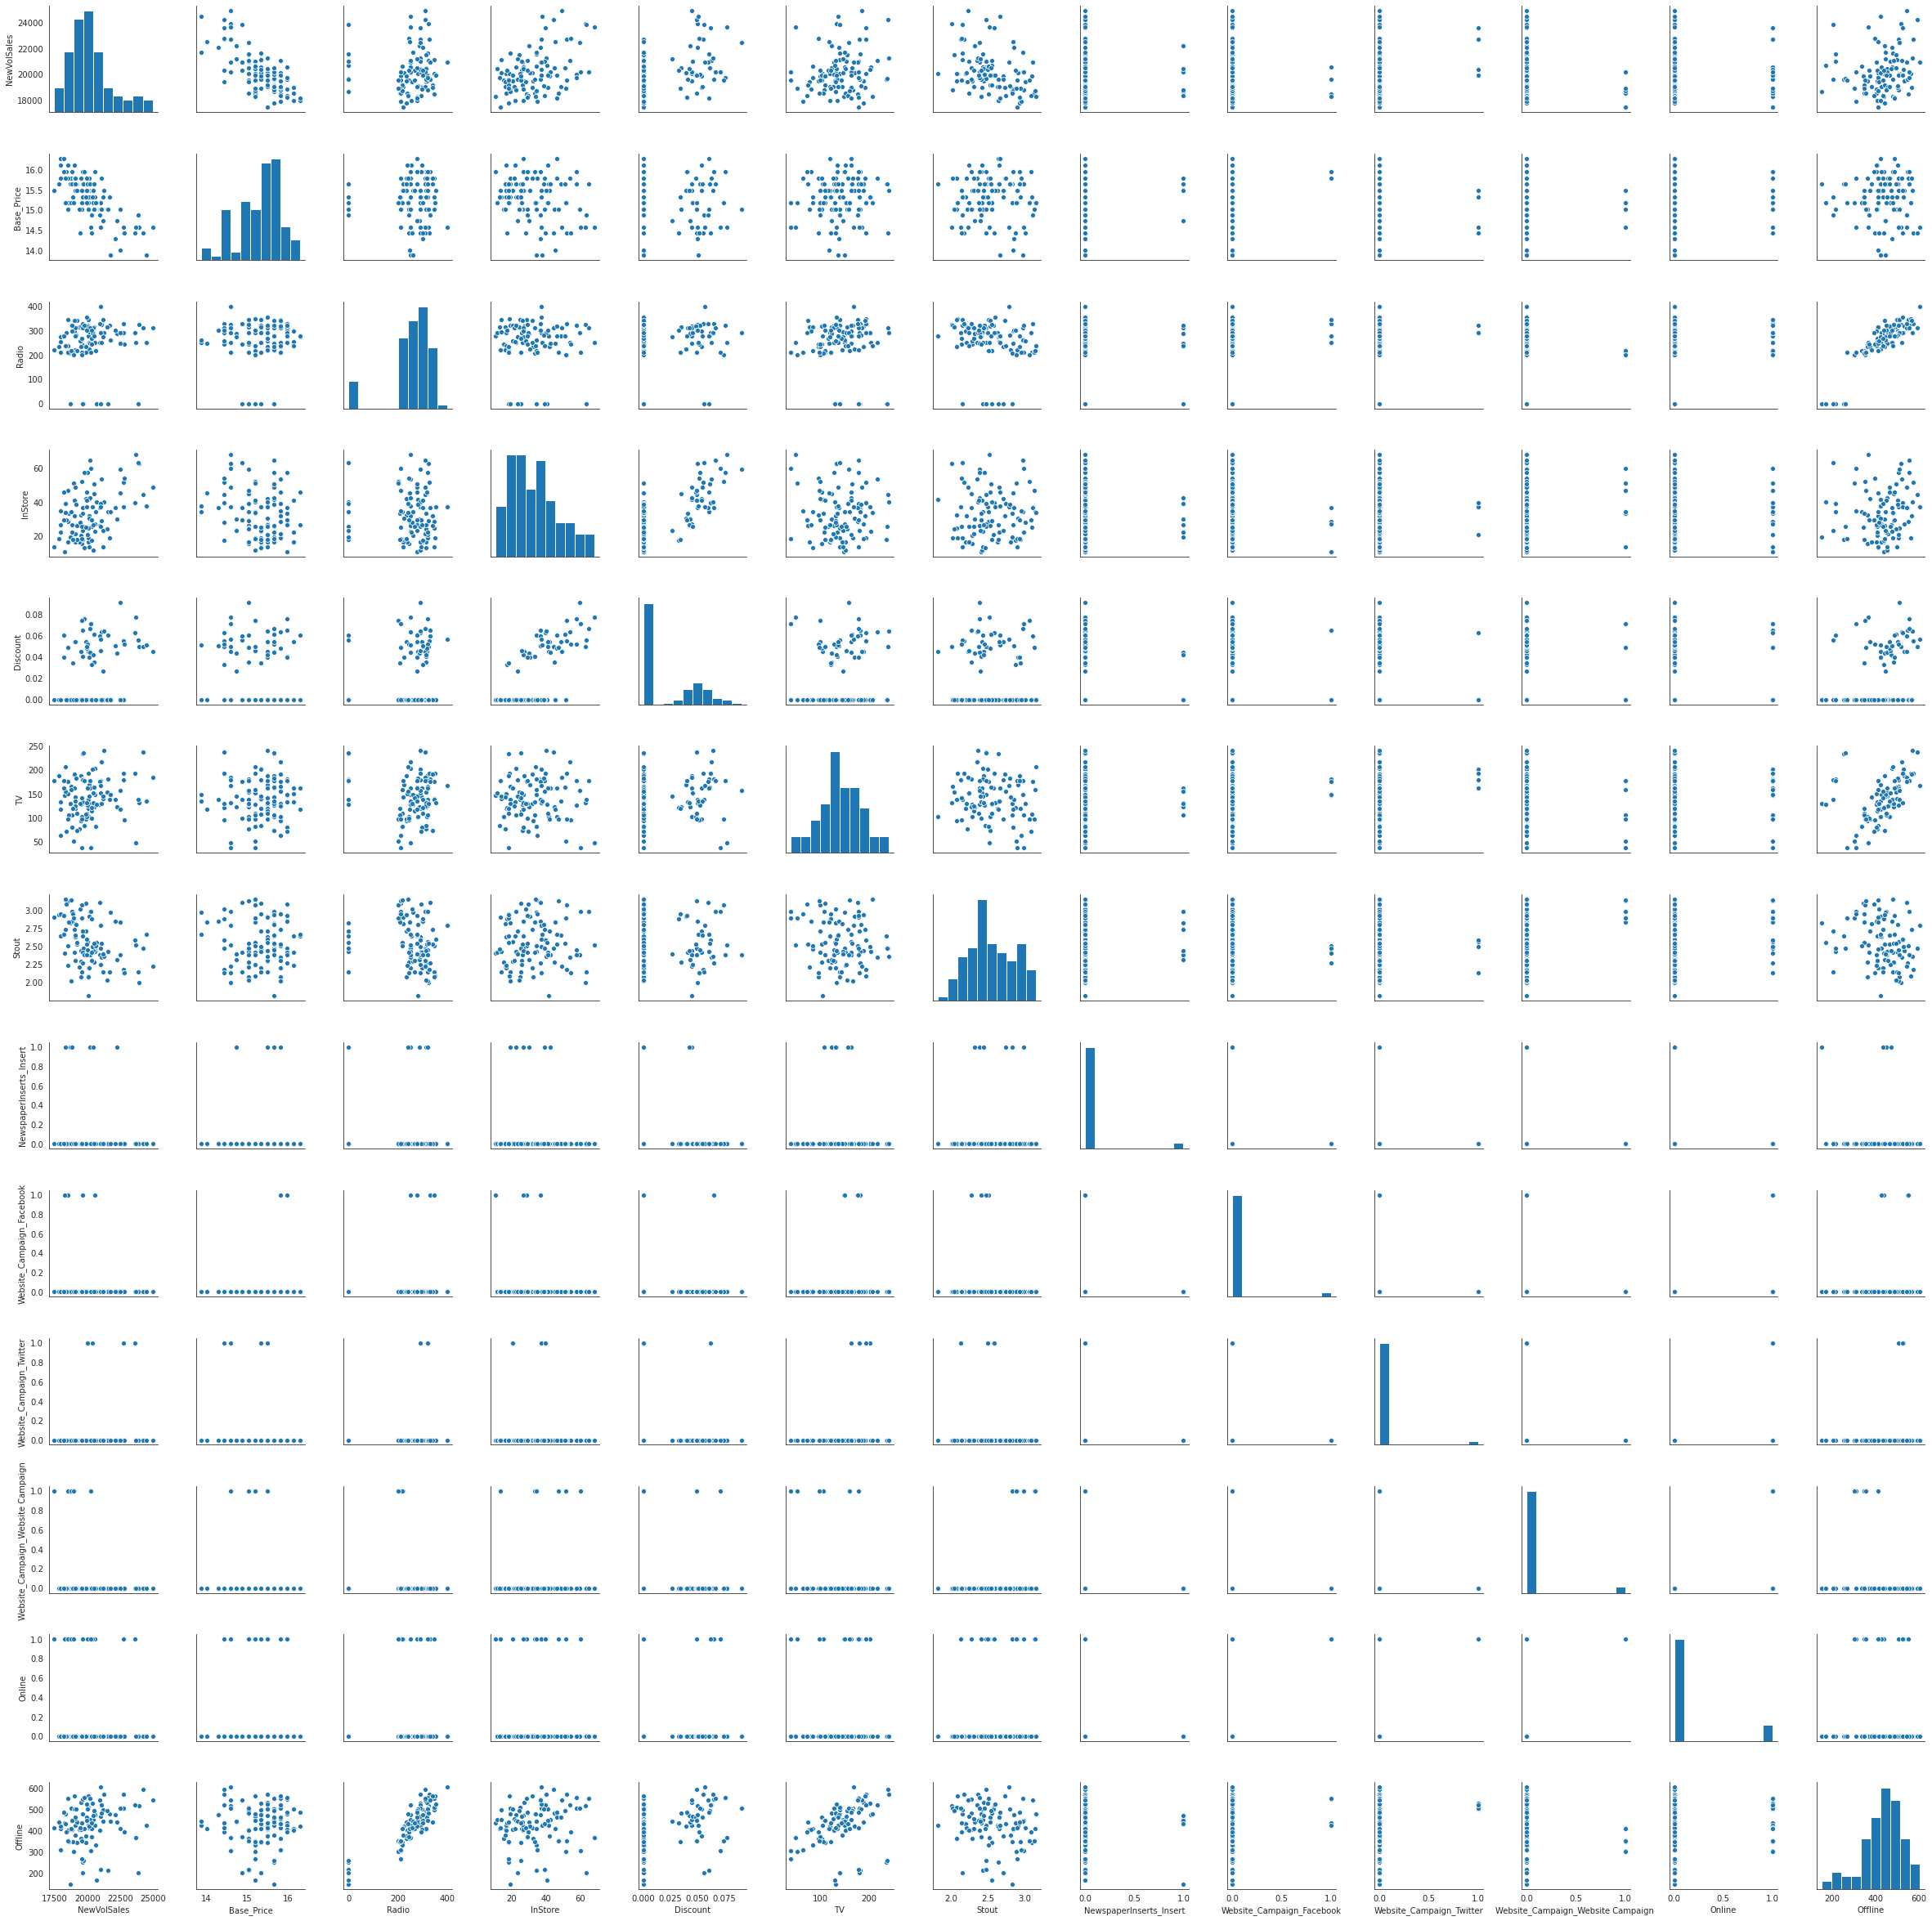

In [357]:
sns.pairplot(data = marketing)

### Heat Map

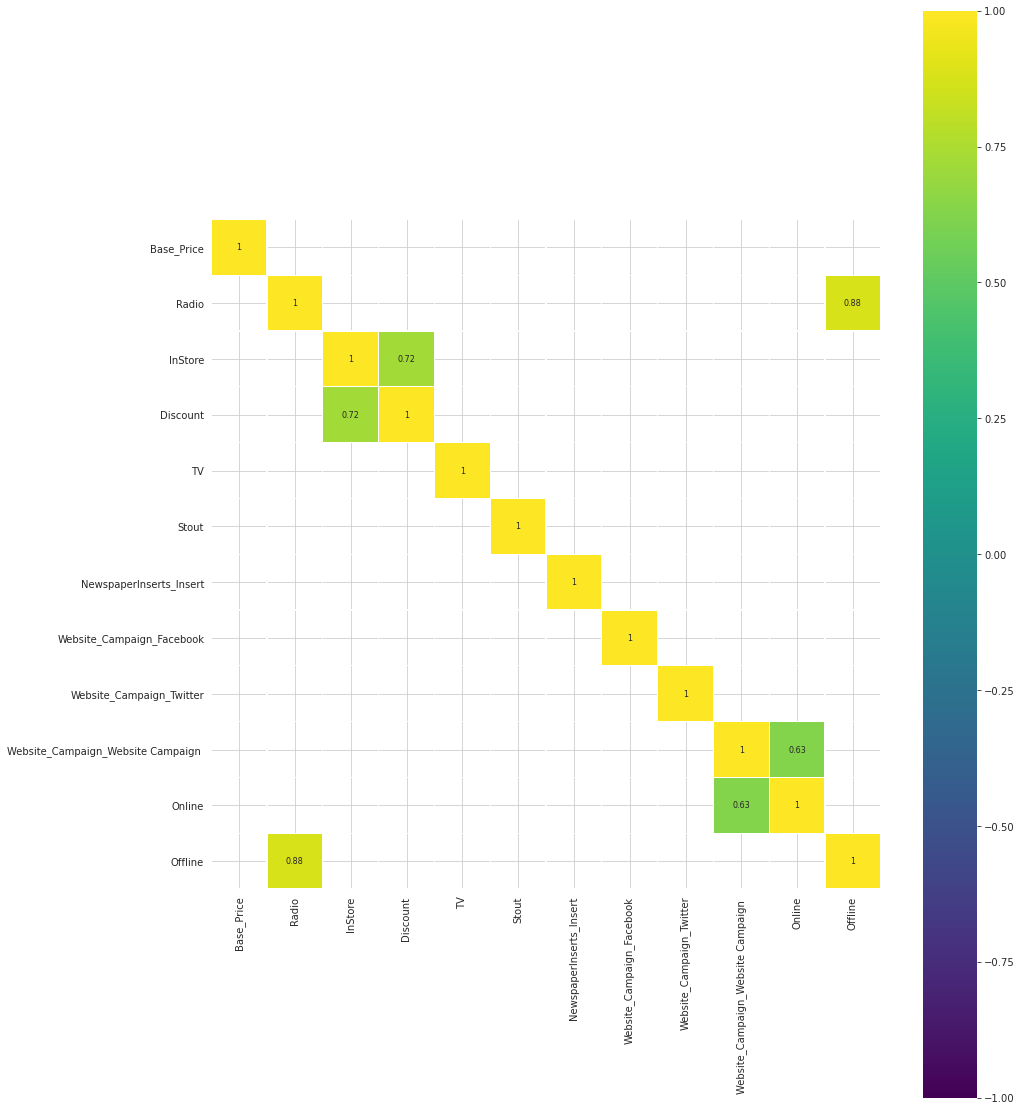

In [358]:
corr = marketing.drop('NewVolSales', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(15, 20))


ax = sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.8)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True)

ax.xaxis.grid(True)
ax.yaxis.grid(True)
plt.show();

Only the feature we created have good coorelation with its component features, which is obvious.

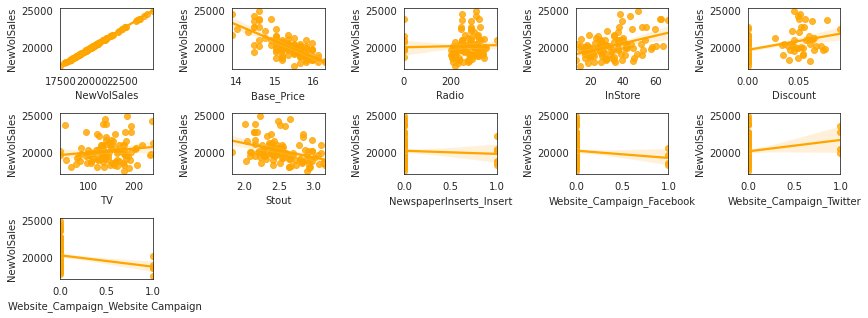

In [359]:
# relation to the target
fig = plt.figure(figsize = (12,7))
for i in np.arange(11):
    ax = fig.add_subplot(5,5,i+1)
    sns.regplot(x = marketing.iloc[:,i], y = marketing.NewVolSales, color = 'orange')

plt.tight_layout()
plt.show();

# Observations:
- Features such as 'Base_Price', 'Instore', 'Tv' and 'Stout' are showing linear relationship with 'NewVolSales', though they have few data point farer from the regression line.
- Lets now fit a model with these features and then lets see the performance of the model.

# Linear Regression Model with statsmodel

In [360]:
reg_model = smf.ols("NewVolSales~Base_Price+InStore+TV+Discount+Stout",data=marketing) 
#ols - Ordinary Least Square model
#OLS fits the linear regression model with Ordinary Least Squares

#Fitting the model

results = reg_model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            NewVolSales   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     76.97
Date:                Fri, 05 Jun 2020   Prob (F-statistic):           2.22e-32
Time:                        21:01:29   Log-Likelihood:                -830.03
No. Observations:                 104   AIC:                             1672.
Df Residuals:                      98   BIC:                             1688.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.454e+04   2299.098     23.722      0.0

# Observations:
1. We can observe that the model we got fit has the capacity of 79% of expalinable variance. Can be further improved.
2. The intercept of the regresion function is 5.454e+04.
3. The follwed by Intercept coeff values are the respect coeffiencient of those X's.
4. P-Values for all the features except 'Discount' are less than 0.05.  

### Now, let get the predictions from the model and compare the prediction with the actual values, from the we can caluclate MAE and MAPE score.

# Model Quality Evaluation

In [361]:
#Prediction on marketing data

pred = results.predict(marketing)

#Actaul values of marketing.NewVolSales

actual = marketing.NewVolSales

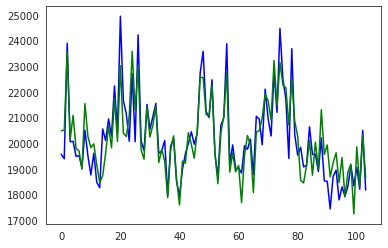

<Figure size 5040x3600 with 0 Axes>

In [362]:
## Actual vs Predicted plot
plt.plot(actual,"blue")
plt.plot(pred,"green")
plt.figure(figsize=(70,50));

## Residuals vs. predicting variables (actual) plots

In [363]:
residuals = results.resid

residuals.head()

0    -916.45
1   -1115.29
2     339.63
3     -85.26
4   -1019.27
dtype: float64

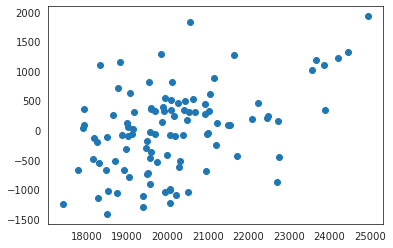

In [364]:
plt.scatter(actual, residuals);

# Note:
### We can plot the residuals versus each of the predicting variables to look for ***independence assumption***. 
     - If the residuals are distributed uniformly randomly around the zero x-axes and do not form specific clusters, then the assumption holds true. 
     
### In this particular problem, we observe ***more or less uniformly random.***

# Fitted vs. residuals plot to check homoscedasticity

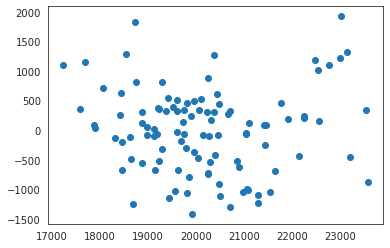

In [365]:
plt.scatter(pred, residuals);

### Variance is increasing
- We clearly observe that the variance of the residuals increases with response variable magnitude. Therefore, the problem does not respect homoscedasticity and some kind of variable transformation may be needed to improve model quality.

## Variance influence factors

In [366]:
for i in range(1, len(marketing.columns[:])):
    v = vif(np.matrix(marketing[:]), i)
    print("Variance inflation factor for {}: {}".format(marketing.columns[i], round(v, 2)))

Variance inflation factor for Base_Price: 208.97
Variance inflation factor for Radio: inf
Variance inflation factor for InStore: inf
Variance inflation factor for Discount: 3.84
Variance inflation factor for TV: inf
Variance inflation factor for Stout: 75.18
Variance inflation factor for NewspaperInserts_Insert: 1.1
Variance inflation factor for Website_Campaign_Facebook: inf
Variance inflation factor for Website_Campaign_Twitter: inf
Variance inflation factor for Website_Campaign_Website Campaign : inf
Variance inflation factor for Online: inf
Variance inflation factor for Offline: inf


# Mean Absolute Error

In [367]:
MAE = metrics.mean_absolute_error(actual,pred)

MAE

561.4322002308246

**MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.**

# Mean Absolute Percentage Error

In [368]:
np.mean(abs((pred-actual)/actual))*100

2.77528837295029

**The mean absolute percent error (MAPE) expresses accuracy as a percentage of the error. Because the MAPE is a percentage, it can be easier to understand than the other accuracy measure statistics.**

# Summary:
So we have built a good model with few more iterations we can get more accurate prediction. In this way you can do you EDA and Visualisation to your data and build a Linear Regression model with the statsmodels libraries. 